### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [24]:
df = pd.read_excel('https://github.com/RanggaRijasa/DataMining2024/raw/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [25]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [28]:
df.isnull().sum() / len(df) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0.002020
TP_TRN,0.002020
KDSUP,72.501667
KAS,8.212730
TRN_DK,0.002020
...,...
TP_ADJ,6.339190
USER,0.002020
TANGGAL,0.002020
JAM,0.002020


In [31]:
df_cleaned = df

relevant_columns = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']
if all(col in df_cleaned.columns for col in relevant_columns):
    df_cleaned = df_cleaned[relevant_columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df_cleaned.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,3
NO_BKT,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3


In [41]:
# prompt: lakukan imputing menggunakan imputer paada semua kolom

from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')  # You can change the strategy as needed

# Fit and transform the imputer on the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Now df_imputed contains the imputed data
df_imputed.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,0
NO_BKT,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


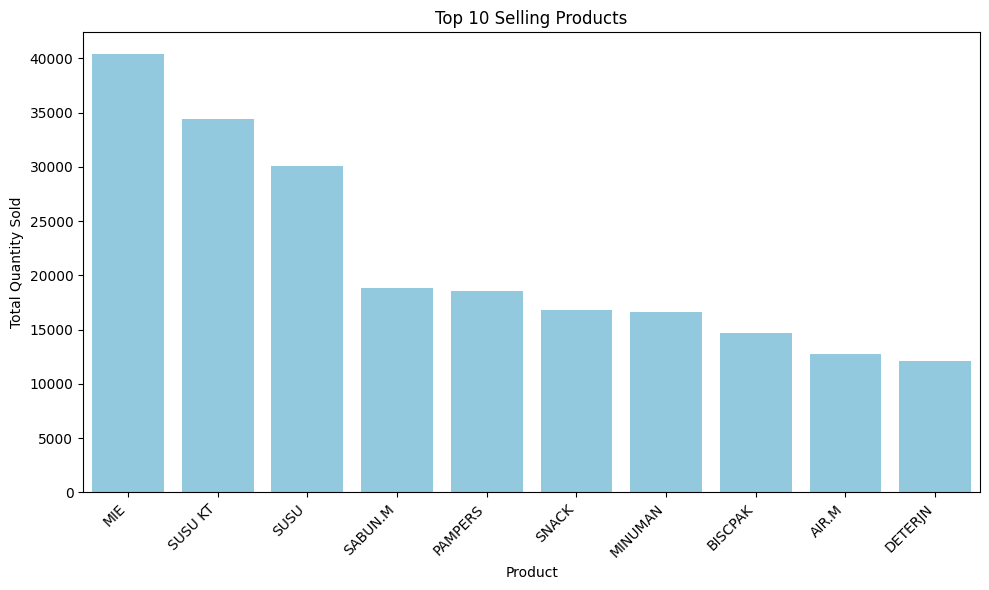

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'QTY' column to numeric
df_cleaned['QTY'] = pd.to_numeric(df_cleaned['QTY'], errors='coerce')

# Calculate top 10 selling products
top_products = df_cleaned.groupby('KEL')['QTY'].sum().nlargest(10)

# Create bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment for better readability
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


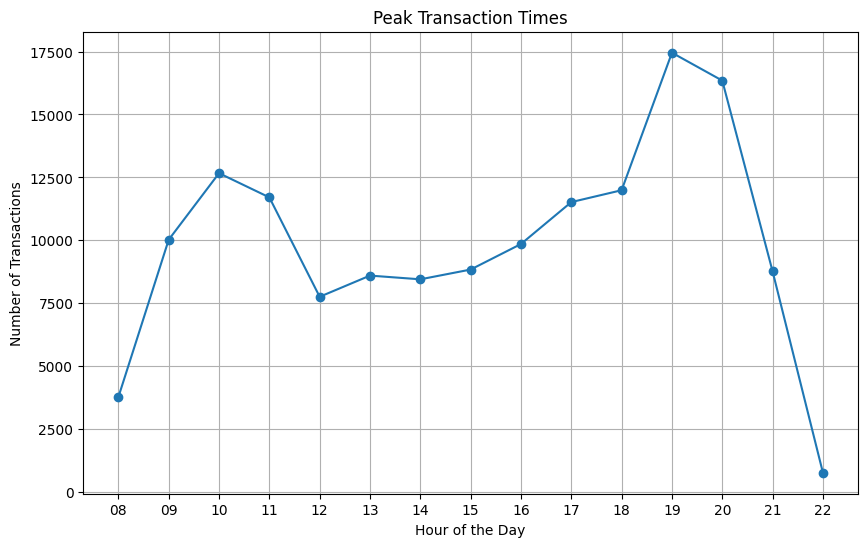

In [45]:
# prompt: buatkan visualisasi yang menunjukan peak transaction di jam berapa

# Convert 'JAM' column to datetime objects
df_cleaned['JAM'] = pd.to_datetime(df_cleaned['JAM'], format='%H:%M:%S').dt.time

# Group by hour and sum the transactions
hourly_transactions = df_cleaned.groupby(df_cleaned['JAM'].astype(str).str[:2])['JLH_TRANS'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_transactions.index, hourly_transactions.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Peak Transaction Times')
plt.grid(True)
plt.xticks(hourly_transactions.index)  # Show all hours on the x-axis
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


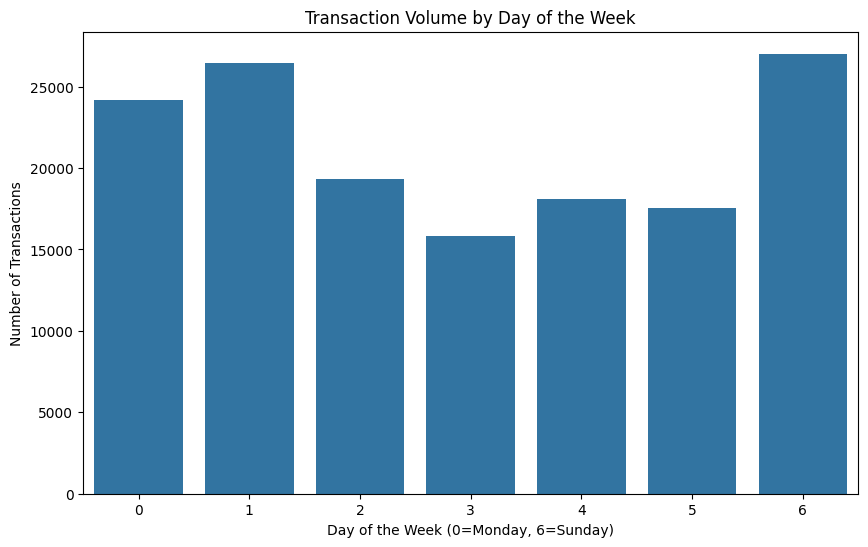

In [46]:
# Assuming 'df_cleaned' is your DataFrame with 'TANGGAL' and 'JLH_TRANS' columns
# Convert 'TANGGAL' to datetime objects if it's not already
df_cleaned['TANGGAL'] = pd.to_datetime(df_cleaned['TANGGAL'])

# Extract the day of the week (0=Monday, 6=Sunday)
df_cleaned['DAY_OF_WEEK'] = df_cleaned['TANGGAL'].dt.dayofweek

# Group by day of the week and sum transactions
daily_transactions = df_cleaned.groupby('DAY_OF_WEEK')['JLH_TRANS'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_transactions.index, y=daily_transactions.values)
plt.title('Transaction Volume by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Transactions')
plt.show()

# Apriori Algorithm

In [53]:
apriori_data = pd.crosstab(df_cleaned['NO_BKT'], df_cleaned['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-18aaf985f75e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037990,(AIR.M)
1,0.032250,(ASESORS)
2,0.033589,(B DAPUR)
3,0.063598,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032359,(COKLAT)
6,0.026593,(DDORANT)
7,0.083604,(DETERJN)
8,0.028506,(GULA)
9,0.021373,(HBL)


In [56]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068982,0.063598,0.021974,0.318542,5.008652,0.017587,1.374115,0.859646
1,(BISCPAK),(SNACK),0.063598,0.068982,0.021974,0.345509,5.008652,0.017587,1.422507,0.854703
2,(DETERJN),(MIE),0.083604,0.078876,0.023258,0.278195,3.526991,0.016664,1.276140,0.781837
3,(MIE),(DETERJN),0.078876,0.083604,0.023258,0.294872,3.526991,0.016664,1.299616,0.777824
4,(DETERJN),(SOFTENR),0.083604,0.042882,0.027604,0.330173,7.699624,0.024019,1.428904,0.949506
5,(SOFTENR),(DETERJN),0.042882,0.083604,0.027604,0.643722,7.699624,0.024019,2.572137,0.909108
6,(DETERJN),(SUSU KT),0.083604,0.166525,0.023996,0.287022,1.723592,0.010074,1.169004,0.458117
7,(SUSU KT),(DETERJN),0.166525,0.083604,0.023996,0.144100,1.723592,0.010074,1.070680,0.503694
8,(P GIGI),(PAMPERS),0.076225,0.139714,0.020607,0.270348,1.935007,0.009958,1.179036,0.523078
9,(PAMPERS),(P GIGI),0.139714,0.076225,0.020607,0.147496,1.935007,0.009958,1.083602,0.561681


Berdasarkan itemset yang sering muncul dan aturan asosiasi yang diberikan, berikut adalah saran tata letak yang dapat diterapkan untuk meningkatkan peluang penjualan di supermarket:


1. Penempatan Produk Berdasarkan Popularitas:

Kelompokkan Produk Terlaris: Letakkan produk-produk dari kategori 'KEL' yang termasuk dalam top 10 terlaris di area yang mudah dijangkau dan terlihat oleh pelanggan, seperti dekat pintu masuk atau di rak display utama.
Produk Pendukung: Tempatkan produk-produk pendukung atau komplementer di dekat produk terlaris. Misalnya, jika 'Food' adalah salah satu kategori terlaris, letakkan produk-produk seperti bumbu dapur, saus, atau peralatan makan di dekatnya.
2. Strategi Penempatan Produk:

Product Bundling: Tawarkan paket bundling produk-produk yang sering dibeli bersama. Misalnya, jika 'Electronic accessories' dan 'Health and beauty' sering dibeli bersama, buat paket bundling yang berisi kedua produk tersebut dengan harga khusus.
Cross-Merchandising: Tempatkan produk-produk dari kategori berbeda yang saling melengkapi di dekat satu sama lain. Misalnya, letakkan produk perawatan rambut di dekat produk perawatan kulit, atau letakkan makanan ringan di dekat minuman.
End-Cap Displays: Manfaatkan end-cap displays (rak di ujung lorong) untuk menampilkan produk-produk yang ingin Anda promosikan atau produk-produk yang sering dibeli bersama.
3. Promosi dan Penawaran Khusus:

Diskon Bundling: Berikan diskon khusus untuk pembelian produk-produk dalam paket bundling.
Promosi Silang: Tawarkan promosi silang, seperti "Beli produk A, dapatkan diskon untuk produk B".
Program Loyalitas: Berikan poin reward atau diskon khusus kepada pelanggan yang sering membeli produk-produk tertentu atau kombinasi produk tertentu.
4. Analisis Lebih Lanjut:

Market Basket Analysis: Lakukan analisis market basket analysis yang lebih mendalam untuk mengidentifikasi pola pembelian pelanggan yang lebih spesifik. Ini dapat membantu Anda menemukan kombinasi produk yang lebih tepat untuk cross-selling.
Customer Segmentation: Lakukan segmentasi pelanggan berdasarkan perilaku pembelian mereka. Ini akan membantu Anda menyesuaikan strategi cross-selling untuk setiap segmen pelanggan.
Contoh Implementasi:

Jika 'Food' dan 'Beverages' sering dibeli bersama, letakkan kedua kategori produk tersebut di lorong yang berdekatan.
Tawarkan paket bundling produk perawatan rambut dan perawatan kulit dengan harga khusus.
Berikan diskon untuk pembelian makanan ringan saat pelanggan membeli minuman.